# Google Analytics Capstone Project

In [ ]:
#Install these packages first:
# pip install --upgrade google-cloud-bigquery
# pip install pandas-gbq -U

#and follow instructions on 
#https://cloud.google.com/bigquery/docs/reference/libraries#client-libraries-install-python


#This page is helpful to understand the GA outputs
#https://support.google.com/analytics/answer/3437719?hl=en


In [1]:
from google.cloud import bigquery
import pandas_gbq
import pandas as pd
import seaborn as sns

In [2]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS']="my_project.json"
client = bigquery.Client()
project_id = "winged-woods-214006"

In [4]:
listtables = (
    """
    SELECT
 * EXCEPT(is_typed)
FROM
 `bigquery-public-data.google_analytics_sample`.INFORMATION_SCHEMA.TABLES
WHERE
 table_type="BASE TABLE"
     """
)

dftables = pandas_gbq.read_gbq(listtables, project_id=project_id)
dftables.sort_values('table_name')

,table_catalog,table_schema,table_name,table_type,is_insertable_into,creation_time
59,bigquery-public-data,google_analytics_sample,ga_sessions_20160801,BASE TABLE,YES,2018-03-28 16:15:06.433000+00:00
243,bigquery-public-data,google_analytics_sample,ga_sessions_20160802,BASE TABLE,YES,2018-03-28 16:15:39.710000+00:00
283,bigquery-public-data,google_analytics_sample,ga_sessions_20160803,BASE TABLE,YES,2018-03-28 16:16:19.805000+00:00
133,bigquery-public-data,google_analytics_sample,ga_sessions_20160804,BASE TABLE,YES,2018-03-28 18:10:09.285000+00:00
155,bigquery-public-data,google_analytics_sample,ga_sessions_20160805,BASE TABLE,YES,2018-03-28 18:11:01.479000+00:00
...,...,...,...,...,...,...
250,bigquery-public-data,google_analytics_sample,ga_sessions_20170728,BASE TABLE,YES,2018-03-31 01:03:59.130000+00:00
15,bigquery-public-data,google_analytics_sample,ga_sessions_20170729,BASE TABLE,YES,2018-03-31 01:04:22.486000+00:00
192,bigquery-public-data,google_analytics_sample,ga_sessions_20170730,BASE TABLE,YES,2018-03-31 01:04:49.031000+00:00
25,bigquery-public-data,google_analytics_sample,ga_sessions_20170731,BASE TABLE,YES,2018-03-31 01:05:17.061000+00:00


In [25]:
query = (
    """
    SELECT *
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE _TABLE_SUFFIX BETWEEN '20160801' AND '20160802'
     """
)

In [26]:
df_original = pandas_gbq.read_gbq(query, project_id=project_id)

In [27]:
df_original

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,None,5,1470191844,1470191844,20160802,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Oceania', 'subContinent': 'Aust...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 19, 'minu...",9932908116119920975,None,None,Organic Search,Not Socially Engaged
1,None,2,1470127145,1470127145,20160802,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 1, 'minut...",5320937337095104430,None,None,Direct,Not Socially Engaged
2,None,1,1470176183,1470176183,20160802,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 15, 'minu...",2314762785260651364,None,None,Organic Search,Not Socially Engaged
3,None,1,1470169596,1470169596,20160802,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",1144912080450618887,None,None,Direct,Not Socially Engaged
4,None,1,1470180889,1470180889,20160802,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 16, 'minu...",1408951569184570430,None,None,Direct,Not Socially Engaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,None,85,1470109494,1470109494,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 20, 'minu...",3608475193341679870,None,None,Paid Search,Not Socially Engaged
3847,None,18,1470074719,1470074719,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",6248742189359702187,None,None,Referral,Not Socially Engaged
3848,None,8,1470097795,1470097795,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",1749010407044905351,None,None,Direct,Not Socially Engaged
3849,None,6,1470094609,1470094609,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 16, 'minu...",2430496949275205085,None,None,Direct,Not Socially Engaged


In [29]:
import datetime

df_original.visitStartTime  = df_original.visitStartTime.apply(datetime.datetime.fromtimestamp)
print(df_original.visitStartTime)
print(df_original.geoNetwork)

0      2016-08-02 22:37:24
1      2016-08-02 04:39:05
2      2016-08-02 18:16:23
3      2016-08-02 16:26:36
4      2016-08-02 19:34:49
               ...        
3846   2016-08-01 23:44:54
3847   2016-08-01 14:05:19
3848   2016-08-01 20:29:55
3849   2016-08-01 19:36:49
3850   2016-08-02 02:39:14
Name: visitStartTime, Length: 3851, dtype: datetime64[ns]
0       {'continent': 'Oceania', 'subContinent': 'Aust...
1       {'continent': 'Europe', 'subContinent': 'North...
2       {'continent': 'Europe', 'subContinent': 'North...
3       {'continent': 'Americas', 'subContinent': 'Nor...
4       {'continent': 'Americas', 'subContinent': 'Nor...
                              ...                        
3846    {'continent': 'Americas', 'subContinent': 'Nor...
3847    {'continent': 'Americas', 'subContinent': 'Nor...
3848    {'continent': 'Asia', 'subContinent': 'Southea...
3849    {'continent': 'Americas', 'subContinent': 'Nor...
3850    {'continent': 'Americas', 'subContinent': 'Nor...
Name: g

In [128]:
#for i in range(len(df_original)):
 #   print(i, "-", len(df_original.hits[i]))
#df_original.hits[1989]

In [134]:
print("Unnesting Traffic Source")
df_ts = df_original.trafficSource.apply(pd.Series)
print("Unnesting adwordsClickInfo")
df_aci = df_ts.adwordsClickInfo.apply(pd.Series)
print("Unnesting totals")
df_totals = df_original.totals.apply(pd.Series)
print("Unnesting device")
df_device = df_original.device.apply(pd.Series)
print("Unnesting geoNetwork")
df_geo = df_original.geoNetwork.apply(pd.Series)

Unnesting Traffic Source
Unnesting adwordsClickInfo
Unnesting totals
Unnesting device
Unnesting geoNetwork


In [135]:
#df_original.hits = [df_original.hits[x][0] for x in range(len(df_original))]

In [136]:
#df_hits = df_original.hits.apply(pd.Series)

df = pd.concat([df_original, df_totals, df_ts, df_aci, df_device, df_geo], axis = 1)

df = df.drop(["adwordsClickInfo", "trafficSource", "totals", "device", "geoNetwork"], axis = 1)

In [137]:
df 

,visitId,fullVisitorId,visitNumber,date,channelGrouping,visits,hits,pageviews,timeOnSite,bounces,...,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,1470248512,0039616461997960147,1,20160803,Organic Search,1.0,1.0,1.0,NaN,1.0,...,Eastern Europe,Bulgaria,Sofia City Province,(not set),Sofia,not available in demo dataset,net1.bg,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,1470272835,5705587814808849172,3,20160803,Referral,1.0,1.0,1.0,NaN,1.0,...,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Santa Clara,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
2,1470248080,8588238917361961084,3,20160803,Organic Search,1.0,1.0,1.0,NaN,1.0,...,Northern America,United States,California,San Francisco-Oakland-San Jose CA,San Francisco,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
3,1470293375,0542559015058454861,2,20160803,Referral,1.0,1.0,1.0,NaN,1.0,...,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,sify.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,1470237634,8011568098628043130,2,20160803,Organic Search,1.0,1.0,1.0,NaN,1.0,...,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,com,not available in demo dataset,not available in demo dataset,not available in demo dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12599,1470172252,3598460042863917988,1,20160802,Social,1.0,2.0,2.0,5.0,NaN,...,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,frontiernet.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
12600,1470168196,1779049177421419538,1,20160802,Social,1.0,2.0,2.0,14.0,NaN,...,Central America,Mexico,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,not available in demo dataset,not available in demo dataset
12601,1470174539,3943122815438884409,1,20160802,Social,1.0,2.0,2.0,22.0,NaN,...,Southern Europe,Spain,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,rima-tde.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
12602,1470203629,8645397636995498017,1,20160802,Social,1.0,2.0,2.0,9.0,NaN,...,Eastern Asia,Japan,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset


In [138]:
coltodrop = []
for column in df:
    if len(df[column].value_counts())<=1:
        coltodrop.append(df[column].name)
    
coltodrop

['visits',
 'bounces',
 'newVisits',
 'screenviews',
 'uniqueScreenviews',
 'timeOnScreen',
 'sessionQualityDim',
 'isTrueDirect',
 'campaignCode',
 'campaignId',
 'adGroupId',
 'creativeId',
 'criteriaId',
 'page',
 'criteriaParameters',
 'customerId',
 'adNetworkType',
 'targetingCriteria',
 'isVideoAd',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'javaEnabled',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation']

In [139]:
df = df.drop(coltodrop, axis = 1)

In [140]:
df

,visitId,fullVisitorId,visitNumber,date,channelGrouping,hits,pageviews,timeOnSite,transactions,transactionRevenue,...,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain
0,1470248512,0039616461997960147,1,20160803,Organic Search,1.0,1.0,NaN,NaN,NaN,...,Windows,False,desktop,Europe,Eastern Europe,Bulgaria,Sofia City Province,(not set),Sofia,net1.bg
1,1470272835,5705587814808849172,3,20160803,Referral,1.0,1.0,NaN,NaN,NaN,...,Macintosh,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Santa Clara,(not set)
2,1470248080,8588238917361961084,3,20160803,Organic Search,1.0,1.0,NaN,NaN,NaN,...,iOS,True,mobile,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,San Francisco,(not set)
3,1470293375,0542559015058454861,2,20160803,Referral,1.0,1.0,NaN,NaN,NaN,...,Windows,False,desktop,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,sify.net
4,1470237634,8011568098628043130,2,20160803,Organic Search,1.0,1.0,NaN,NaN,NaN,...,Chrome OS,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12599,1470172252,3598460042863917988,1,20160802,Social,2.0,2.0,5.0,NaN,NaN,...,Windows,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,frontiernet.net
12600,1470168196,1779049177421419538,1,20160802,Social,2.0,2.0,14.0,NaN,NaN,...,Windows,False,desktop,Americas,Central America,Mexico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prod-infinitum.com.mx
12601,1470174539,3943122815438884409,1,20160802,Social,2.0,2.0,22.0,NaN,NaN,...,Windows,False,desktop,Europe,Southern Europe,Spain,not available in demo dataset,not available in demo dataset,not available in demo dataset,rima-tde.net
12602,1470203629,8645397636995498017,1,20160802,Social,2.0,2.0,9.0,NaN,NaN,...,Windows,False,desktop,Asia,Eastern Asia,Japan,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set)


In [141]:
df.to_csv("sampledata.csv")

  channelGrouping  totalTransactionRevenue  visits  timeOnSite
0      Affiliates                      NaN   554.0  248.658147
1          Direct               213.597333  2465.0  344.291317
2         Display                55.740000    98.0  335.966667
3  Organic Search                76.316400  3588.0  286.990716
4     Paid Search               534.820000   218.0  328.866667
5        Referral               115.465882  1776.0  325.578297
6          Social                23.990000  3905.0  130.061350


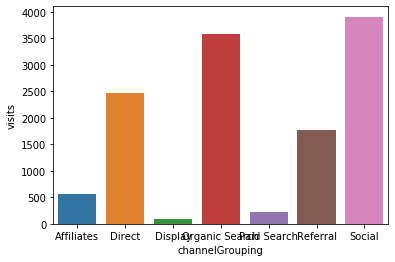

In [166]:
dfCG = df.groupby("channelGrouping").agg({"totalTransactionRevenue":"mean", "visits" : "sum", "timeOnSite" : "mean"}).reset_index()
dfCG.totalTransactionRevenue = dfCG.totalTransactionRevenue/1000000
print(dfCG)
sns.barplot(x = "channelGrouping", y = "visits", data = dfCG)


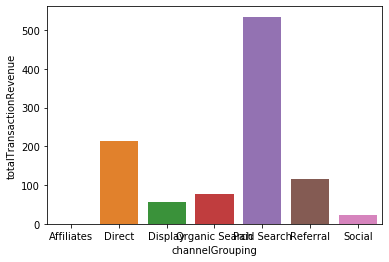

In [167]:
sns.barplot(x = "channelGrouping", y = "totalTransactionRevenue", data = dfCG)

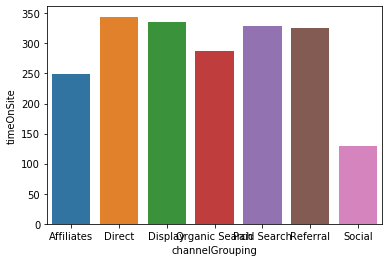

In [168]:
sns.barplot(x = "channelGrouping", y = "timeOnSite", data = dfCG)

                  source  totalTransactionRevenue  visits
0               (direct)               154.869231  3748.0
15                google                93.951154  3745.0
62           youtube.com                23.990000  3675.0
1               Partners                      NaN   554.0
3   analytics.google.com                      NaN   120.0


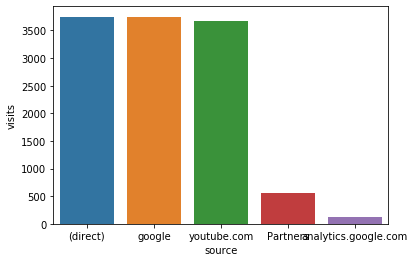

In [162]:
dfsource = df.groupby("source").agg({"totalTransactionRevenue":"mean", "visits" : "sum"}).reset_index()
dfsource.totalTransactionRevenue = dfsource.totalTransactionRevenue/1000000
dfsource = dfsource.sort_values(by = "visits", ascending = False).head()
print(dfsource)
sns.barplot(x = "source", y = "visits", data = dfsource)
#sns.barplot(x = "source", y = "totalTransactionRevenue", data = dfsource)

In [165]:
df.socialEngagementType.value_counts()

Not Socially Engaged    12604
Name: socialEngagementType, dtype: int64